In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("resultado_unificados_3.tsv", sep="\t", header=0, encoding="cp1252")

In [3]:
dataset.head(5)

,ID,code_original,nl,response,code,BLEU,CODE_BLEU,EM,parse_success,processed,model_id,technique
0,1,int function ( ) { _total = extractList ( ) . ...,actually walks the bag to make sure the count ...,"{\n ""id"": ""chatcmpl-8f9r17xlwoxyo1s02qq5cn"",\...",public class BagCounter { public static voi...,0.000683,0.274486,0,True,True,phi-3.1-mini-128k-instruct,baseline
1,2,void function ( boolean arg0 ) { fStatementsRe...,controls whether the compiler should perform s...,"{\n ""id"": ""chatcmpl-e0sc752rcfc9qan3suotv"",\n...",public class CompilerOptions { private bool...,0.003830,0.251399,0,True,True,phi-3.1-mini-128k-instruct,baseline
2,3,boolean function ( ) { return false ; },override and return true for database updates ...,"{\n ""id"": ""chatcmpl-zgvwm8ok2nm86fkakj0mmy"",\...",public abstract boolean updateDatabaseAndChang...,0.001196,0.264149,0,True,True,phi-3.1-mini-128k-instruct,baseline
3,4,String function ( String arg0 ) { return ZKUti...,get identity znode .,"{\n ""id"": ""chatcmpl-au232fdsfnimis3zgw7va"",\n...",import org.apache.zookeeper.KeeperException;im...,0.000893,0.269510,0,True,True,phi-3.1-mini-128k-instruct,baseline
4,5,int function ( GenVector < C > arg0 ) { if ( !...,"compareto , lexicogaphical comparison .","{\n ""id"": ""chatcmpl-n2c47mvdb717ru0l7ley3"",\n...",public class LexicoComparer { public static...,0.001869,0.000000,0,True,True,phi-3.1-mini-128k-instruct,baseline


In [4]:
# Parámetro para los TOP/BOTTOM
N = 15

# Función para computar estadísticas por modelo+técnica
def resumen_modelo(x):
    return pd.Series({
        "CODE_BLEU_mean": x["CODE_BLEU"].mean(),
        "CODE_BLEU_median": x["CODE_BLEU"].median(),
        f"TOP@{N}": x["CODE_BLEU"].nlargest(N).mean(),
        f"BOTTOM@{N}": x["CODE_BLEU"].nsmallest(N).mean(),
    })

# Agrupar por model_id y technique
tabla_resultados = (
    dataset
    .groupby(["model_id", "technique"])
    .apply(resumen_modelo)
    .reset_index()
)

# Ordenar por mejor promedio (opcional)
tabla_resultados = tabla_resultados.sort_values("CODE_BLEU_mean", ascending=False)

tabla_resultados

C:\Users\Rikudo\AppData\Local\Temp\ipykernel_17004\1943744296.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(resumen_modelo)


,model_id,technique,CODE_BLEU_mean,CODE_BLEU_median,TOP@15,BOTTOM@15
3,deepseek-coder-6.7b-kexer,few-shot-gpt,0.371264,0.382576,0.590415,0.113134
2,deepseek-coder-6.7b-kexer,few-shot,0.344858,0.327626,0.527086,0.158107
5,deepseek-coder-6.7b-kexer,one-shot-gpt,0.342545,0.356678,0.557405,0.055931
4,deepseek-coder-6.7b-kexer,one-shot,0.339346,0.321030,0.539496,0.114688
1,deepseek-coder-6.7b-kexer,context,0.317753,0.291150,0.505489,0.103485
0,deepseek-coder-6.7b-kexer,baseline,0.310180,0.284221,0.503095,0.122599
10,deepseek-r1-distill-qwen-7b,one-shot,0.292766,0.279636,0.553503,0.000000
7,deepseek-r1-distill-qwen-7b,context,0.281260,0.272312,0.562185,0.000000
13,phi-3.1-mini-128k-instruct,context,0.259962,0.267255,0.443408,0.000000
11,deepseek-r1-distill-qwen-7b,one-shot-gpt,0.258121,0.263962,0.533673,0.000000


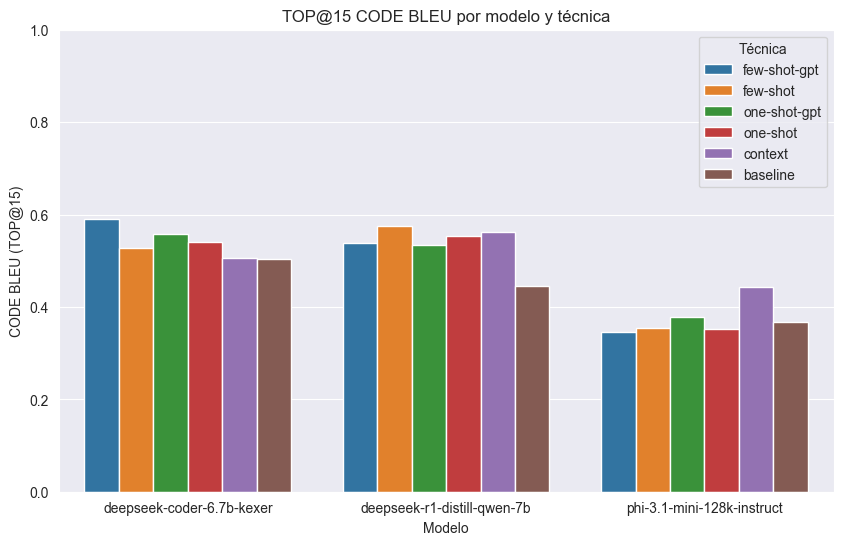

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=tabla_resultados,
    x="model_id", 
    y=f"TOP@{N}",
    hue="technique"   # <- cambiamos aquí
)
plt.title(f"TOP@{N} CODE BLEU por modelo y técnica")
plt.ylabel(f"CODE BLEU (TOP@{N})")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0,1)
plt.show()

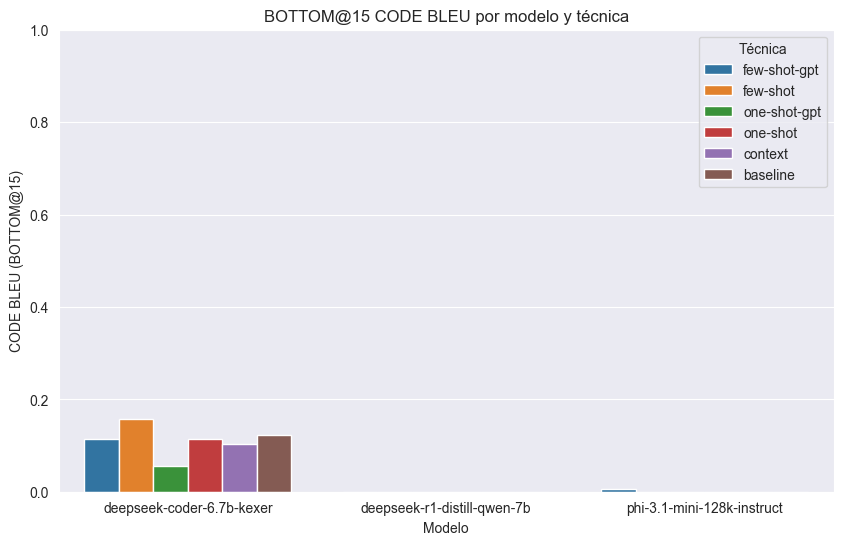

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=tabla_resultados,
    x="model_id",
    y=f"BOTTOM@{N}",
    hue="technique"   # <- cambiamos aquí
)
plt.title(f"BOTTOM@{N} CODE BLEU por modelo y técnica")
plt.ylabel(f"CODE BLEU (BOTTOM@{N})")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0,1)
plt.show()

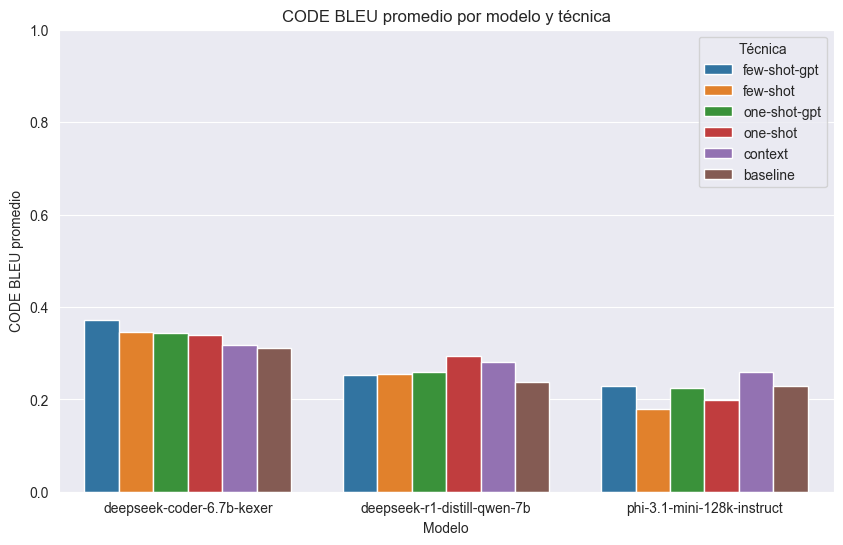

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_resultados,
    x="model_id",
    y=f"CODE_BLEU_mean",
    hue="technique"  # <- cambiamos aquí
)
plt.title(f"CODE BLEU promedio por modelo y técnica")
plt.ylabel(f"CODE BLEU promedio")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0, 1)
plt.show()

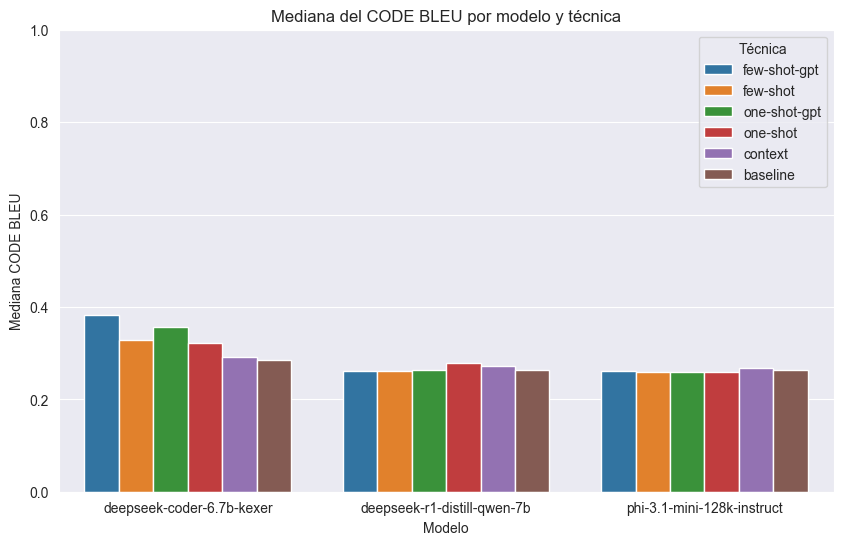

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tabla_resultados,
    x="model_id",
    y=f"CODE_BLEU_median",
    hue="technique"  # <- cambiamos aquí
)
plt.title(f"Mediana del CODE BLEU por modelo y técnica")
plt.ylabel(f"Mediana CODE BLEU")
plt.xlabel("Modelo")
plt.legend(title="Técnica")
plt.ylim(0, 1)
plt.show()